In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
library(readxl)

In [24]:
raisinurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/00617/Raisin_Dataset.zip"
temp <- tempfile()
download.file(raisinurl,temp)
raisinzip <- unzip(temp, "Raisin_Dataset/Raisin_Dataset.xlsx")
raisin <- read_excel(raisinzip)
raisin

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


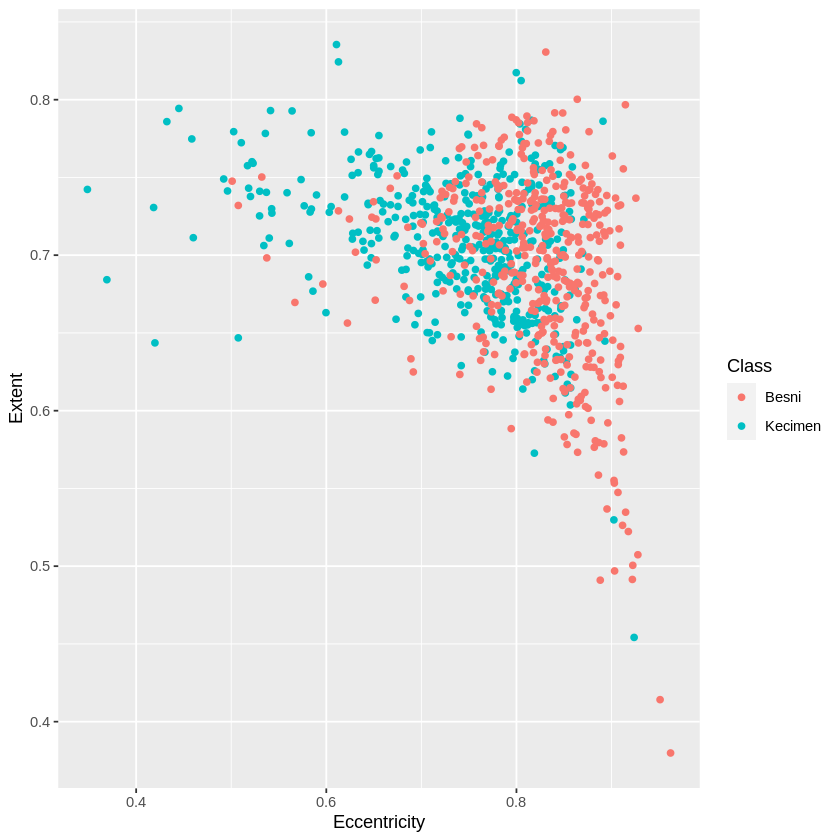

In [35]:
raisinplot<- raisin |>
    ggplot(aes(x=Eccentricity, y=Extent, color=Class)) +
    geom_point() +
    labs(x="Eccentricity", y= "Extent")
raisinplot

In [40]:
fishurl<-"https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
fishtemp <- tempfile()
download.file(fishurl,fishtemp)
fish <- read_delim(fishtemp)
colnames(fish)<- c("sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight","rings")
fish

Rows: 4176 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): M
dbl (8): 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.44,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


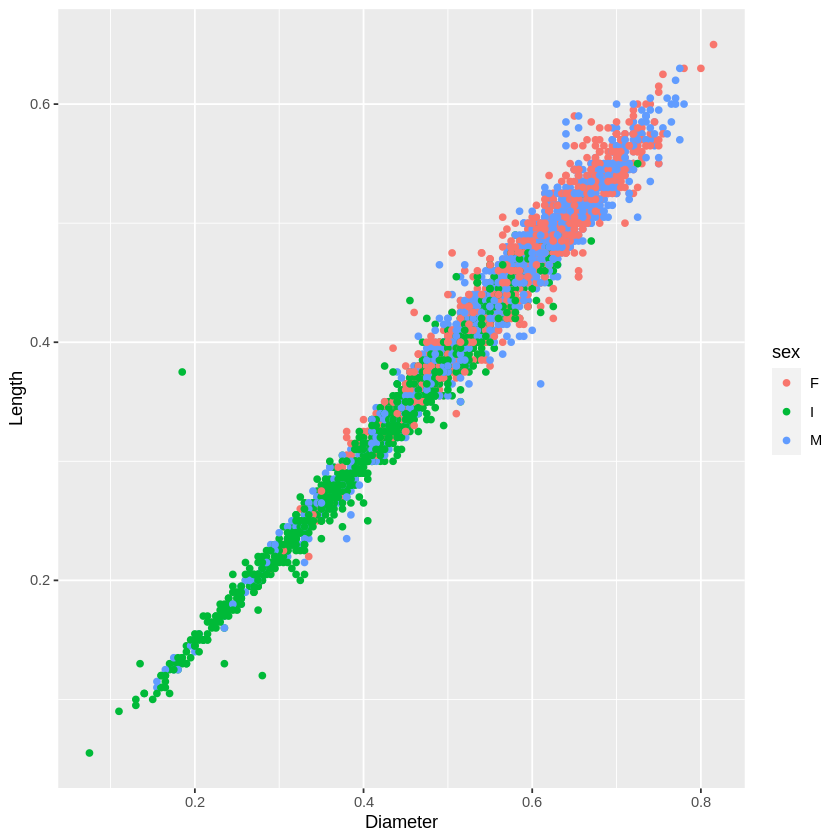

In [55]:
fishplot<- fish |>
    ggplot(aes(x=length, y=diameter, color=sex)) +
    geom_point() +
    labs(x="Diameter", y= "Length")
fishplot